In [1]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directory = 'data/sites_CO/'

In [3]:
X_train = image_dataset_from_directory(
    directory, labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=False, seed=None,
    validation_split=0.3, subset='training', interpolation='bilinear', follow_links=False
)

Found 12 files belonging to 2 classes.
Using 9 files for training.


In [4]:
X_test = image_dataset_from_directory(
    directory, labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=False, seed=None,
    validation_split=0.3, subset='validation', interpolation='bilinear', follow_links=False
)

Found 12 files belonging to 2 classes.
Using 3 files for validation.


In [5]:
X_train.class_names

['others', 'test']

In [6]:
X_test.class_names

['others', 'test']

In [7]:
image_batch, labels_batch = next(iter(X_train))

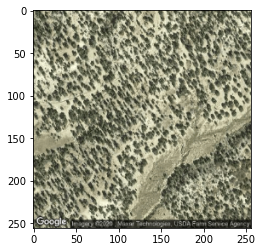

In [13]:
plt.imshow(image_batch[0].numpy().astype("uint8"))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# # I don't think I need these, but just for reference:
# from skimage.transform import resize
# # if need to rescale
# img_shp_desired = (100, 100, 3)
# img_resized = resize(img_cropped_2, img_shp_desired, mode='constant')
# plt.imshow(img_resized)
# # if need to grayscale
# plt.imshow(img_hsv[:,:,0], cmap='gray');

In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [ ]:
# check balance of classes do anything about it?

In [ ]:
# # create train and test set
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# train_datagen = ImageDataGenerator(
#     rescale=1. / 255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1. / 255)

# train_generator = train_datagen.flow_from_directory(
#     data_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#     validation_data_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='binary')

# model.fit_generator(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // batch_size)

In [ ]:
# set parameters
num_classes = 2
epochs = 3
AUTOTUNE = tensorflow.data.experimental.AUTOTUNE
X_train = X_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
X_test = X_test.cache().prefetch(buffer_size=AUTOTUNE)
img_height = 256
img_width = 256
#input_shape = (img_rows, img_cols, 1)   # 1 channel image input (grayscale) KEEP
nb_filters = 50    # number of convolutional filters to use
pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
kernel_size = (4, 4)  # convolutional kernel size, slides over image to learn features
# model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

# what about padding? below same uses padding if needed

'''
When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a 
number of output units from the layer during the training process. Dropout takes a fractional 
number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 
20% or 40% of the output units randomly from the applied layer.
'''

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'), # softmax?
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
#               loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])
              # if multiclass then use this:
              loss=tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# check model
model.summary()

In [ ]:
# run it
history = model.fit(
            X_train,
            validation_data = X_test,
            epochs = epochs,
            batch_size=batch_size,
            verbose = 1
) # weighted_metrics

In [ ]:
# model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
#           verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, verbose=1) # diff that model.predict ? yes.. just gets scores will predict will return classes
print('Test score:', score[0])
print('Test accuracy:', score[1])  # this is the one we care about

In [ ]:
# plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
# edit this function for improvements and track model progress
def define_model(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('tanh'))

    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
model2 = define_model(nb_filters, kernel_size, input_shape, pool_size)

In [ ]:
# augmentation?
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)